# ATP Tennis Data - Player Diff Stats + One Hot Encoding (Player ID Only)


In our previous [notebook](https://github.com/sv650s/sb-capstone2/blob/master/notebooks/5-atp_sklearn_classifier.ipynb), we saw the best performance for the palyer diff dataset with Decision Tree Classifier

In this notebook, we will run the same model with a slightly modified dataset. Instead of have player 1 and player 2 id's as features, we have one hot encoded these as features. All other categorical data has not been one hot encoded yet (ie, tournament id, surface)


### Results from Decision Tree Classifier with player diff + OHE categorical data:

```
Model Score: 0.9307224848075625

              precision    recall  f1-score   support

        Loss       0.93      0.94      0.93      7416
         Win       0.93      0.93      0.93      7394

    accuracy                           0.93     14810
   macro avg       0.93      0.93      0.93     14810
weighted avg       0.93      0.93      0.93     14810
```

# Summary of Results

Decision Tree did slightly better on Win's and overall accuracy

```
Model Score: 0.9326130992572587

              precision    recall  f1-score   support

        Loss       0.93      0.94      0.93      7416
         Win       0.94      0.93      0.93      7394

    accuracy                           0.93     14810
   macro avg       0.93      0.93      0.93     14810
weighted avg       0.93      0.93      0.93     14810
```

* Decision Tree improved slightly
* No improvements for AdaBoost and Logistic Regression
* KNN and Random Forest did worse

### Even though this data set did slightly better. I suspect the model might not be learning the right things because non-ordinal categorical data is not one hot encoded. For future notebooks we will stick with the diff + OHE dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.decomposition import PCA
from datetime import datetime
import pickle
import json
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from util import jupyter_util as ju
from util.model_util import ModelWrapper

%matplotlib inline
sns.set()


# date
DATE_FORMAT = '%Y-%m-%d'
DATE = datetime.now().strftime(DATE_FORMAT)

DESCRIPTION = "diff-ohe_player"


# update this
FEATURE_FILE = f'../datasets/atp_matches_1985-2019_features-{DESCRIPTION}.csv'

START_YEAR = 1998
END_YEAR = 2018

LABEL_COL = 'p1_winner'

# random seed
RSTATE = 1
N_JOBS = 4
MAX_ITER = 100



In [2]:
X_train, X_test, y_train, y_test = ju.get_data(FEATURE_FILE, LABEL_COL, START_YEAR, END_YEAR)

# Logistic Regression

In [3]:

# train our model

lr = ModelWrapper(LogisticRegression(n_jobs = N_JOBS, verbose = 1, random_state = RSTATE),
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                   X_train = X_train,
                   y_train = y_train,
                   X_test = X_test,
                   y_test = y_test).fit()
y_predict_lr = lr.predict()

//anaconda3/envs/capstone2/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/envs/capstone2/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[LibLinear]

Model Score: 0.6698852126941256

              precision    recall  f1-score   support

        Loss       0.67      0.67      0.67      7416
         Win       0.67      0.67      0.67      7394

    accuracy                           0.67     14810
   macro avg       0.67      0.67      0.67     14810
weighted avg       0.67      0.67      0.67     14810

      Loss   Win
Loss  4952  2464
Win   2425  4969


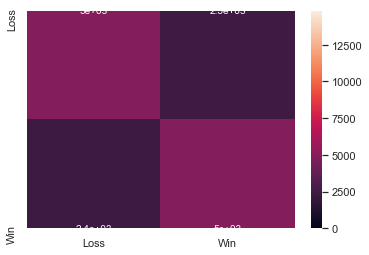

In [4]:
lr.analyze()

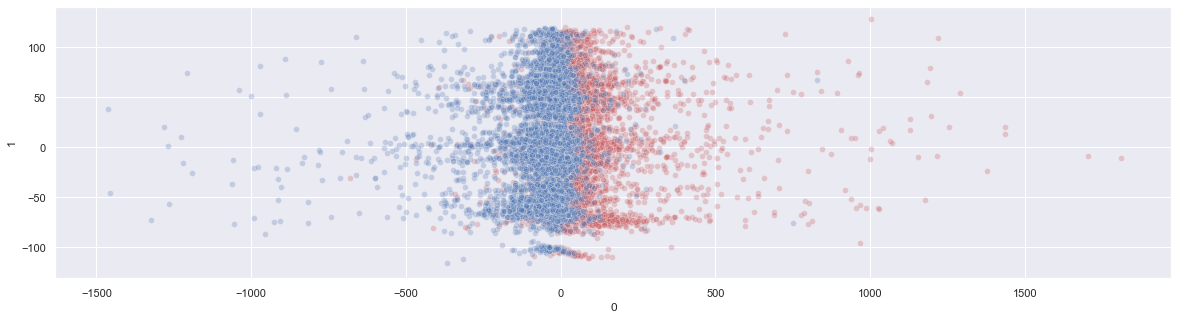

In [5]:
ju.plot_2d(X_test, y_predict_lr)

In [6]:
lr.save()

# KNN

In [7]:

# train our model

knn = ModelWrapper(KNeighborsClassifier(n_jobs = N_JOBS),
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                   X_train = X_train,
                   y_train = y_train,
                   X_test = X_test,
                   y_test = y_test).fit()
y_predict_knn = knn.predict()

Model Score: 0.7894665766374072

              precision    recall  f1-score   support

        Loss       0.77      0.82      0.80      7416
         Win       0.81      0.76      0.78      7394

    accuracy                           0.79     14810
   macro avg       0.79      0.79      0.79     14810
weighted avg       0.79      0.79      0.79     14810

      Loss   Win
Loss  6064  1352
Win   1766  5628


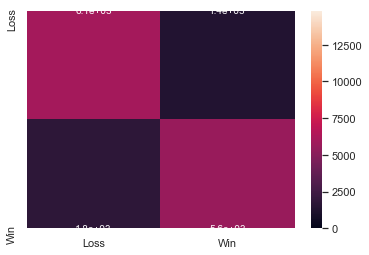

In [8]:
knn.analyze()

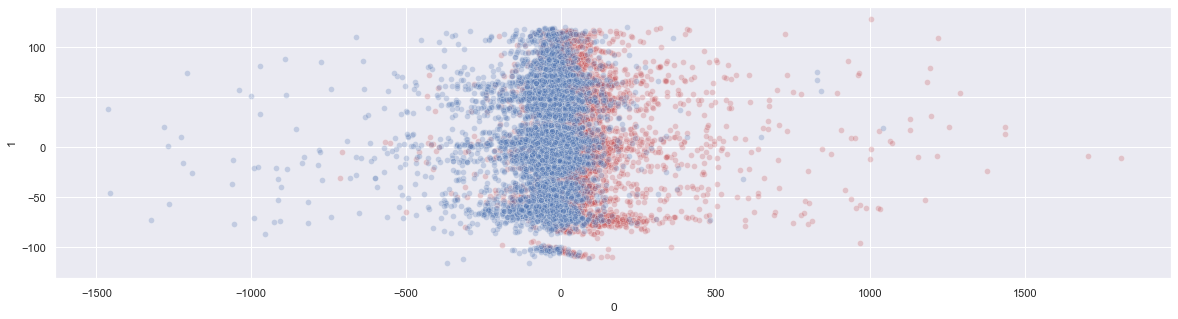

In [9]:
ju.plot_2d(X_test, y_predict_knn)

In [10]:
knn.save()

# Decision Tree

In [11]:

# train our model

dt = ModelWrapper(DecisionTreeClassifier(random_state = RSTATE),
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                   X_train = X_train,
                   y_train = y_train,
                   X_test = X_test,
                   y_test = y_test).fit()
y_predict_dt = dt.predict()

Model Score: 0.9326130992572587

              precision    recall  f1-score   support

        Loss       0.93      0.94      0.93      7416
         Win       0.94      0.93      0.93      7394

    accuracy                           0.93     14810
   macro avg       0.93      0.93      0.93     14810
weighted avg       0.93      0.93      0.93     14810

      Loss   Win
Loss  6945   471
Win    527  6867


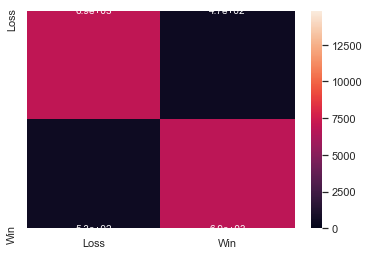

In [12]:
dt.analyze()

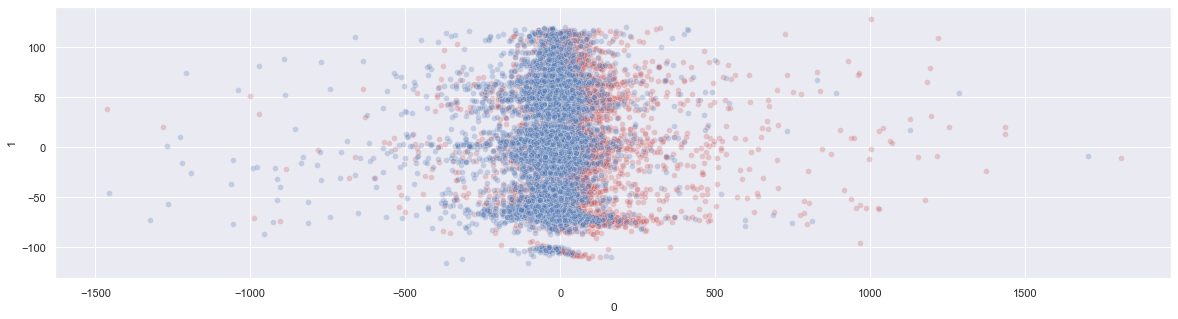

In [13]:
ju.plot_2d(X_test, y_predict_dt)

In [14]:
dt.save()

# Random Forest Classifier

In [15]:

# train our model

rf = ModelWrapper(RandomForestClassifier(random_state=RSTATE, verbose=1),
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                   X_train = X_train,
                   y_train = y_train,
                   X_test = X_test,
                   y_test = y_test).fit()
y_predict_rf = rf.predict()

//anaconda3/envs/capstone2/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    8.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished


Model Score: 0.7698852126941256

              precision    recall  f1-score   support

        Loss       0.75      0.82      0.78      7416
         Win       0.80      0.72      0.76      7394

    accuracy                           0.77     14810
   macro avg       0.77      0.77      0.77     14810
weighted avg       0.77      0.77      0.77     14810

      Loss   Win
Loss  6054  1362
Win   2046  5348


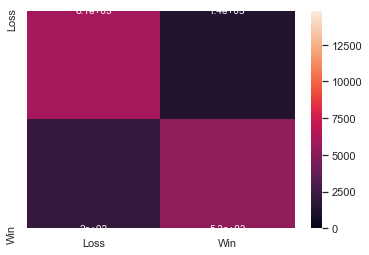

In [16]:
rf.analyze()

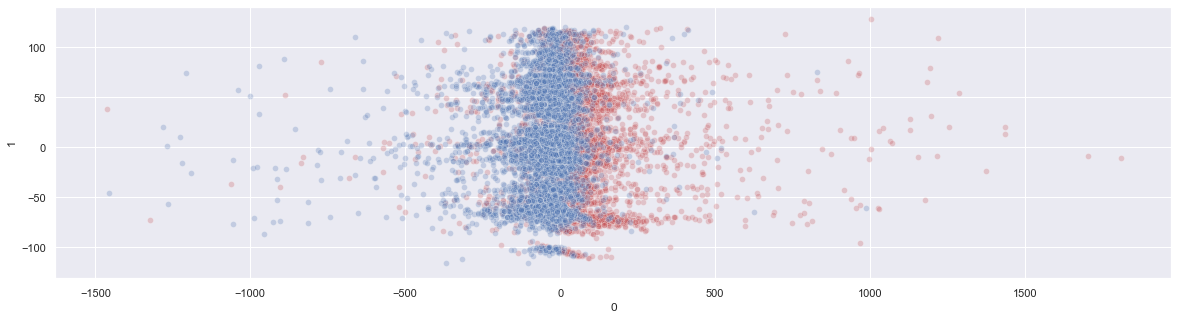

In [17]:
ju.plot_2d(X_test, y_predict_rf)

In [18]:
rf.save()

# Gradient Boosting

In [19]:

# train our model

gb = ModelWrapper(GradientBoostingClassifier(random_state=RSTATE, verbose=1, n_iter_no_change = 4),
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                   X_train = X_train,
                   y_train = y_train,
                   X_test = X_test,
                   y_test = y_test).fit()
y_predict_gb = gb.predict()

      Iter       Train Loss   Remaining Time 
         1           1.3145            8.24m
         2           1.2558            8.15m
         3           1.2068            8.04m
         4           1.1676            8.30m
         5           1.1348            8.18m
         6           1.1078            8.19m
         7           1.0759            8.15m
         8           1.0490            8.03m
         9           1.0266            8.14m
        10           1.0092            8.01m
        20           0.8799            7.32m
        30           0.8182            6.20m
        40           0.7758            5.22m
        50           0.7539            4.32m
        60           0.7338            3.58m
        70           0.6962            2.75m
        80           0.6802            1.82m
        90           0.6695           54.40s
       100           0.6559            0.00s


Model Score: 0.8587440918298447

              precision    recall  f1-score   support

        Loss       0.84      0.89      0.86      7416
         Win       0.88      0.83      0.85      7394

    accuracy                           0.86     14810
   macro avg       0.86      0.86      0.86     14810
weighted avg       0.86      0.86      0.86     14810

      Loss   Win
Loss  6609   807
Win   1285  6109


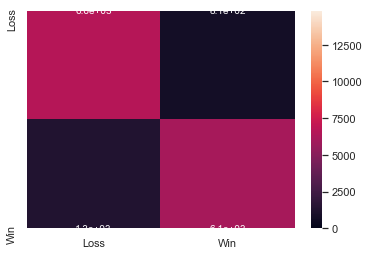

In [20]:
gb.analyze()

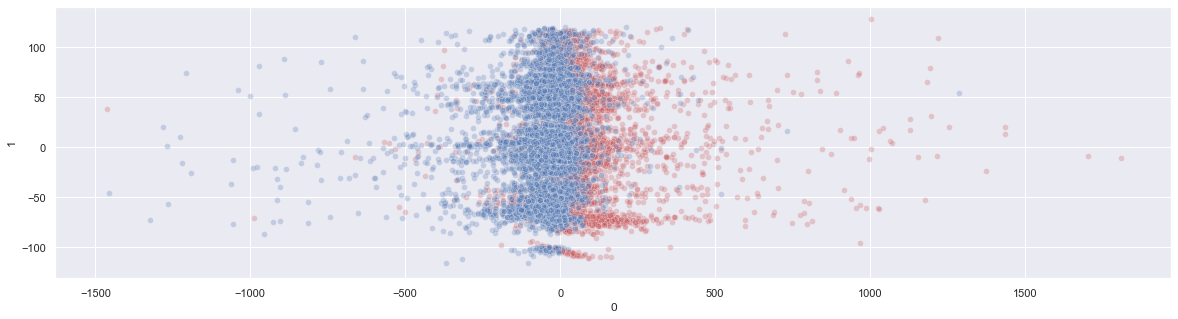

In [21]:
ju.plot_2d(X_test, y_predict_gb)

In [22]:
gb.save()

# AdaBoost

In [23]:
ab = ModelWrapper(AdaBoostClassifier(random_state=RSTATE),
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                   X_train = X_train,
                   y_train = y_train,
                   X_test = X_test,
                   y_test = y_test).fit()
y_predict_ab = ab.predict()

Model Score: 0.7550303848750844

              precision    recall  f1-score   support

        Loss       0.74      0.80      0.76      7416
         Win       0.78      0.71      0.74      7394

    accuracy                           0.76     14810
   macro avg       0.76      0.75      0.75     14810
weighted avg       0.76      0.76      0.75     14810

      Loss   Win
Loss  5896  1520
Win   2108  5286


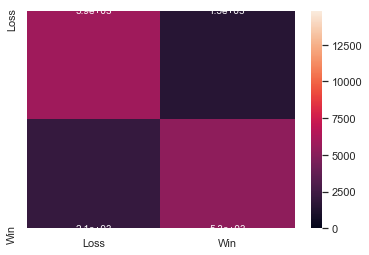

In [24]:
ab.analyze()

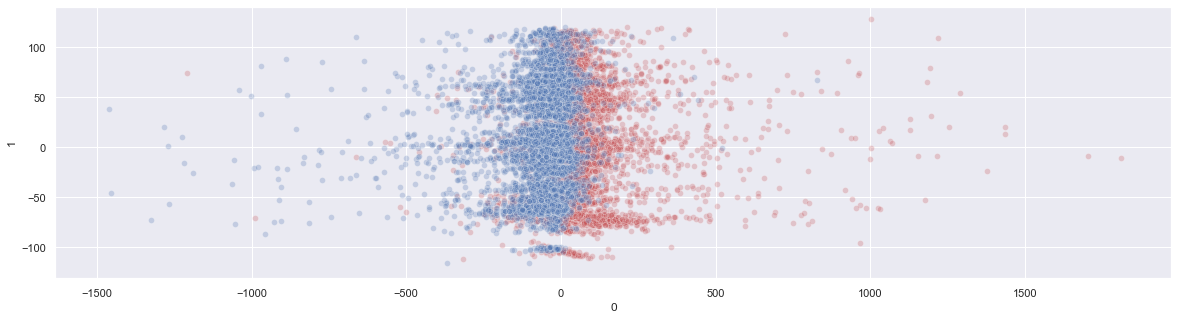

In [25]:
ju.plot_2d(X_test, y_predict_ab)

In [26]:
ab.save()

# Results

* Decision Tree improved slightly
* No improvements for AdaBoost and Logistic Regression
* KNN and Random Forest Did worse

In [27]:
report = pd.read_csv(ab.report_file)

Text(0.5, 1.0, 'Model Accuracy')

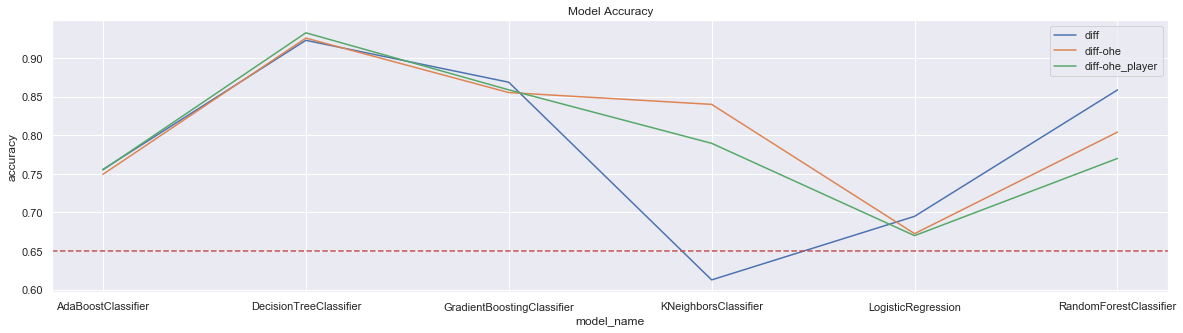

In [29]:
f, a = plt.subplots(1, 1, figsize=(20, 5))

descs = report.description.unique()

for desc in descs:
    report_desc = report[report.description == desc]
    sns.lineplot(x="model_name", y="accuracy", data=report_desc, label=desc)

a.axhline(0.65, ls='--', color='r')
a.set_title(f"Model Accuracy")